In [2]:
%matplotlib notebook
%matplotlib notebook
import sys
import time
import numpy as np
import pandas as pd
import datetime
import pytz
import psycopg2
import traceback
from psycopg2.extras import DictCursor
from sqlalchemy import create_engine
import sqlalchemy as sql
from dateutil.parser import parse
import matplotlib.pyplot as plt
from matplotlib import rcParams
# some plot parameters
rcParams["lines.linewidth"] = 2
rcParams['font.size'] = 15
sys.path.append("../")
import vpcconfig as cf


In [4]:
def get_conn():
    not_done = True
    while not_done:
        try:
            connstr = "dbname='blockforce' user='"+cf.psql_user+\
                            "' host='"+cf.psql_host+\
                           "' password='"+cf.psql_pass+"'"
            conn = psycopg2.connect(connstr)
            estr = "postgresql://"\
                   +cf.psql_user+":"+cf.psql_pass+\
                   "@"+cf.psql_host+":5432/blockforce"

            engine = create_engine(estr)
            not_done = False
            cur = conn.cursor(cursor_factory=DictCursor)
        except:
            traceback.print_exc()
            print("Trying to reconnect!")
            time.sleep(5)
            continue

        return conn, cur, engine

conn,cur,engine = get_conn()

In [7]:
tstart = int(parse('2019-01-01T00:00:00Z').timestamp())
query = f"select * from coindata_30minute where timestamp > {tstart} and exid=701 and symbolpair"\
        f"= 'ETH-USD' order by timestamp"

df = pd.read_sql(query,engine)
df['datetime'] = pd.to_datetime(df['timestamp'],utc=True,unit='s')
df.tail(10)

,id,timestamp,symbolpair,exid,price_high,price_low,price_open,price_close,volume,n_trades,datetime
4436,713367,1554289200,ETH-USD,701,167.89,166.30,167.11,166.70,3070.762650,387,2019-04-03 11:00:00+00:00
4437,713383,1554291000,ETH-USD,701,167.55,166.31,166.70,167.35,997.408456,493,2019-04-03 11:30:00+00:00
4438,713402,1554292800,ETH-USD,701,168.36,167.18,167.18,167.62,2276.550767,621,2019-04-03 12:00:00+00:00
4439,713435,1554294600,ETH-USD,701,171.21,167.47,167.61,170.32,4839.315559,822,2019-04-03 12:30:00+00:00
4440,713453,1554296400,ETH-USD,701,171.80,167.54,170.29,168.67,6069.573752,788,2019-04-03 13:00:00+00:00
4441,713482,1554298200,ETH-USD,701,171.04,168.52,168.69,169.91,3548.443670,759,2019-04-03 13:30:00+00:00
4442,713497,1554300000,ETH-USD,701,171.57,169.32,169.81,170.37,5438.005957,880,2019-04-03 14:00:00+00:00
4443,713527,1554301800,ETH-USD,701,172.00,169.63,170.36,169.99,4153.068192,685,2019-04-03 14:30:00+00:00
4444,713539,1554303600,ETH-USD,701,170.24,167.46,170.00,169.50,3616.817767,882,2019-04-03 15:00:00+00:00
4445,713571,1554305400,ETH-USD,701,170.60,168.24,169.54,170.33,3152.521374,756,2019-04-03 15:30:00+00:00


In [18]:
xdf = pd.read_csv('daily_ETH-USD_exid_701.csv')
xdf['datetime'] = pd.to_datetime(xdf['timestamp'],unit='s',utc=True)

<IPython.core.display.Javascript object>


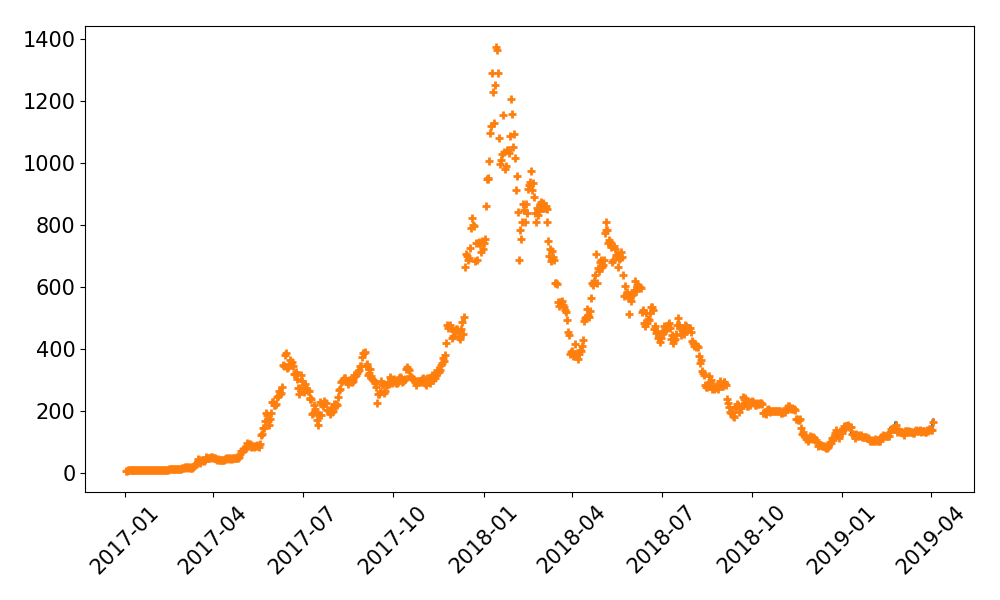

In [19]:
plt.figure(figsize=(10,6))
plt.plot(df['datetime'],df['price_close'],label="30 min")
plt.plot(xdf['datetime'],xdf['price_close'],'+',mew=2,markersize=6,label="daily")
#plt.plot(df['datetime'],df['volume']/df['n_trades'].apply(lambda x: max(0.00001,x)))
ax=plt.gca()
ax.xaxis.set_tick_params(rotation=45)
plt.tight_layout()